# Code du projet

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import treatment
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Fonctions aide

In [2]:
def adjacent(cell, size=None): #size = [nlines, ncolumns] pour éviter de renvoyer des cellules hors labyrinthe
    if size==None:
        return [
            (cell[0]-1, cell[1]  ),
            (cell[0]  , cell[1]-1),
            (cell[0]+1, cell[1]  ),
            (cell[0]  , cell[1]+1)
        ]
    return [adj for adj in adjacent(cell) if (adj[0]>=0 and adj[0]<size[0] and adj[1]>=0 and adj[1]<size[1])]

In [3]:
def get_wall(c1, c2, height):
    """
    Revoie les coordonnées du mur entre les cases c1 et c2 d'un labyrinthe
    """
    if c1[0] == c2[0]: #Mur vertical
        x1 = int( (c1[1]+c2[1]+1)/2 )
        x2 = x1
        y1 = int( height - c1[0] )
        y2 = y1 - 1
        return ((x1, x2), (y1, y2))

    if c1[1] == c2[1]: #Mur horizontal
        x1 = int( c1[1] )
        x2 = x1 + 1
        y1 = int( height - (c1[0]+c2[0]+1)/2 )
        y2 = y1
        return ((x1, x2), (y1, y2))

In [4]:
def show_lab(ax, lab):
    """
    Affiche un labyrinthe lab donné dans un plote matplotlib
    """
    walls = []
    for key in [k for k in lab.keys() if type(k)!=type(' ')]:
        for cell in adjacent(key):
            if cell not in lab[key]:
                walls.append(get_wall(cell, key, lab["nlines"]))
    for wall in walls:
        ax.plot(wall[0], wall[1])
    return ax

## Exemples d'execution des fonctions

In [5]:
#Exemple de structure de donnée représentant un labyrinthe
lab_c = {
    "nlines"  :3,
    "ncolumns":4,
    (0,0):[(1,0)      ], (0,1):[(1,1),(0,2)], (0,2):[(0,1),(0,3)], (0,3):[(0,2),(1,3)       ],
    (1,0):[(0,0),(2,0)], (1,1):[(0,1),(1,2)], (1,2):[(1,1),(1,3)], (1,3):[(1,2),(0,3), (2,3)],
    (2,0):[(1,0),(2,1)], (2,1):[(2,0),(2,2)], (2,2):[(2,1),(2,3)], (2,3):[(2,2),(1,3)       ]
}

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\pyplot.py'>

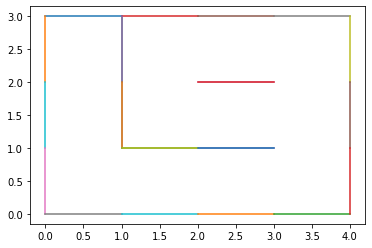

In [6]:
show_lab(plt, lab_c)

In [7]:
def show_graph(ax,lab):
	lines = []
	rows = lab["nlines"]
	cols = lab["ncolumns"]
	for node, edges in lab.items():
		if type(node)==str:
			continue

		nodx = rows - node[0] -0.5
		nody = node[1]+0.5
		ax.scatter([nody],[nodx], marker=".", s=100, color = "black")
		for edge in edges:
			nodeadjx = rows - edge[0] - 0.5
			nodeadjy = edge[1] + 0.5
			ax.plot([nody, nodeadjy],[nodx, nodeadjx], color="black")
	
	return ax

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\pyplot.py'>

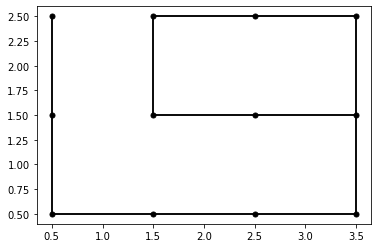

In [8]:
show_graph(plt, lab_c)

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\pyplot.py'>

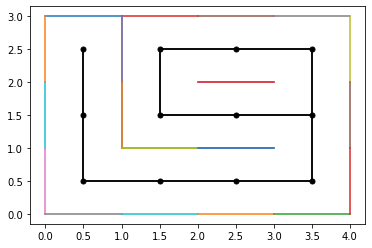

In [9]:
show_lab(plt, lab_c)
show_graph(plt, lab_c)

In [10]:
treatment.nb_murs(lab_c)

5

## Cas du 2x2
### Pseudo-Labyrinthes

In [11]:
L_2x2 = treatment.generate_pseudo_lab(2,2)
L = L_2x2
print(len(L))
L[0]

16


{'ncolumns': 2,
 'nlines': 2,
 (0, 0): [(1, 0), (0, 1)],
 (0, 1): [(0, 0), (1, 1)],
 (1, 0): [(0, 0), (1, 1)],
 (1, 1): [(0, 1), (1, 0)]}

C:\Users\User\AppData\Local\Temp/ipykernel_8532/3588687045.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


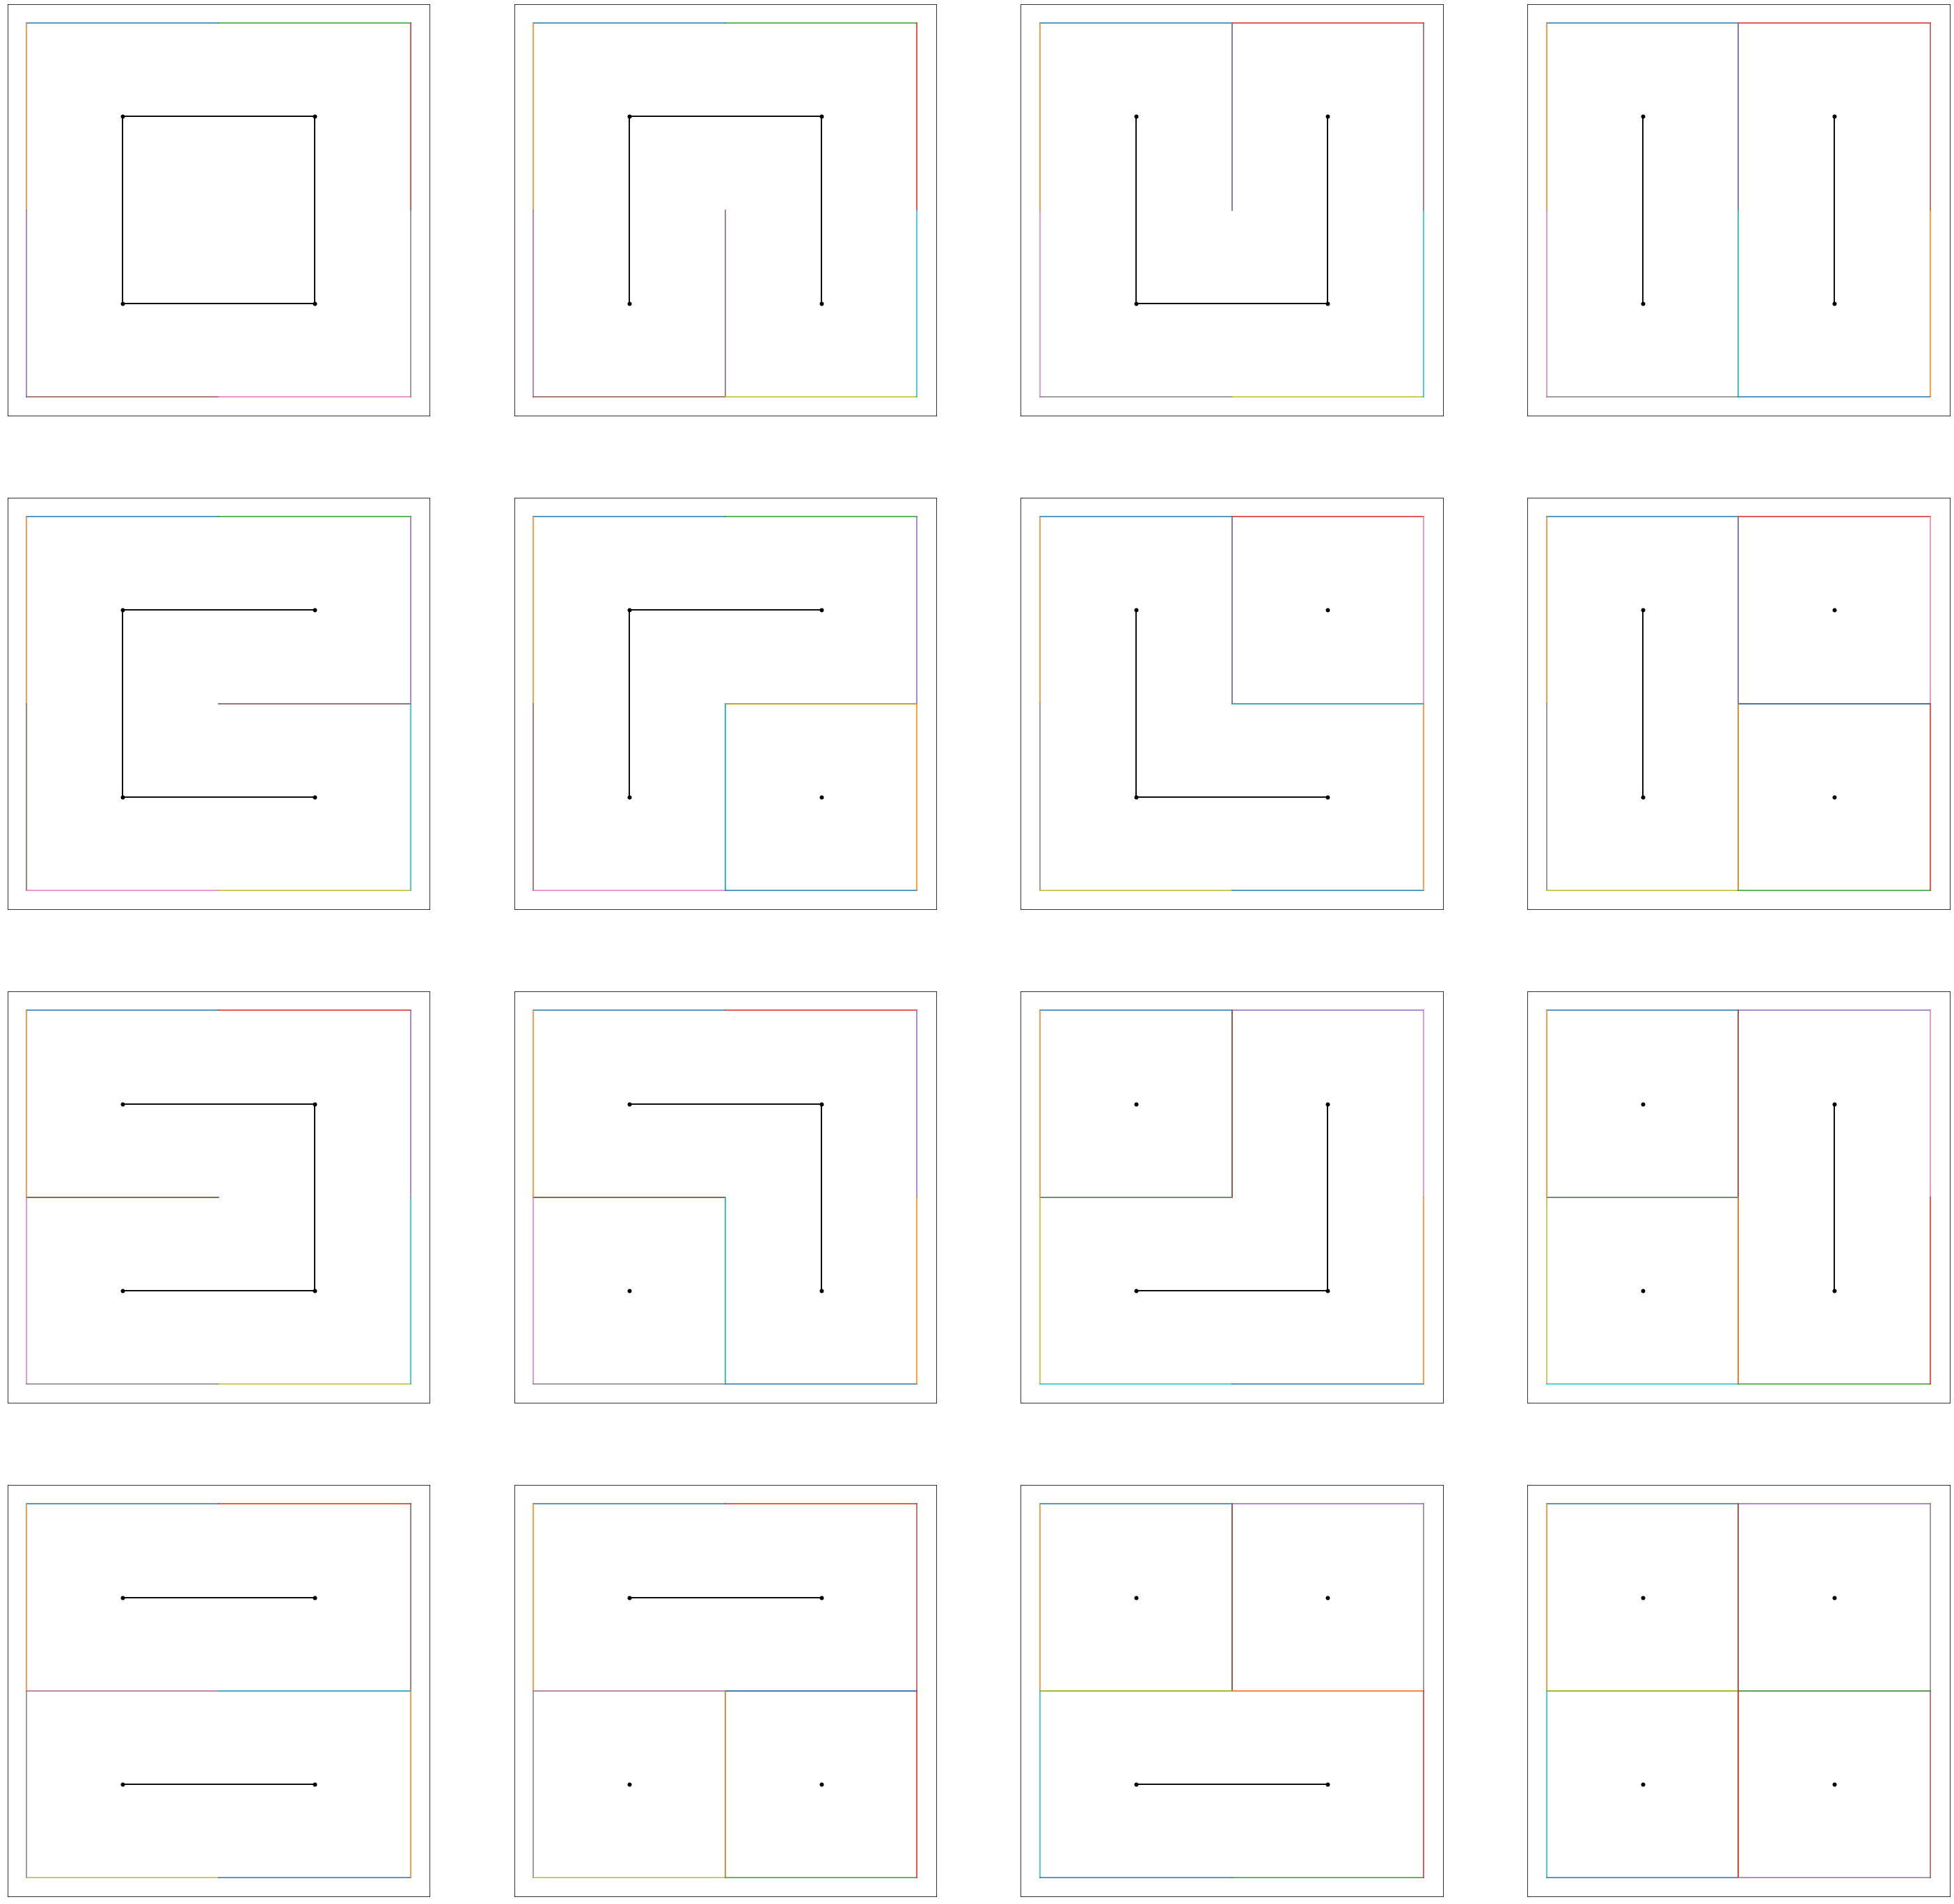

In [12]:
cols = 4
rows = len(L)//cols
fig, axs = plt.subplots(rows, cols, figsize = (50,50*(rows//cols)))
for i in range(rows):
    for n in range(cols):
        axs[i,n].set_yticklabels([])
        axs[i,n].set_xticklabels([])
        axs[i,n].set_xticks([])
        axs[i,n].set_yticks([])
        if(cols*i+n==len(L)):
            break
        else:
            show_lab(axs[i,n], L[cols*i+n])
            show_graph(axs[i,n], L[cols*i+n])
            continue
        break
fig.savefig("data/2x2/Total.png", dpi=200)
fig.show()

In [13]:
for i in range(len(L)):
    plt.clf()
    show_lab(plt,L[i])
    show_graph(plt, L[i])
    plt.xticks([])
    plt.yticks([])
    plt.savefig("data/2x2/{}.png".format(i),dpi=50)
plt.clf()

<Figure size 432x288 with 0 Axes>

### Labyrinthes

C:\Users\User\AppData\Local\Temp/ipykernel_8532/2308305690.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


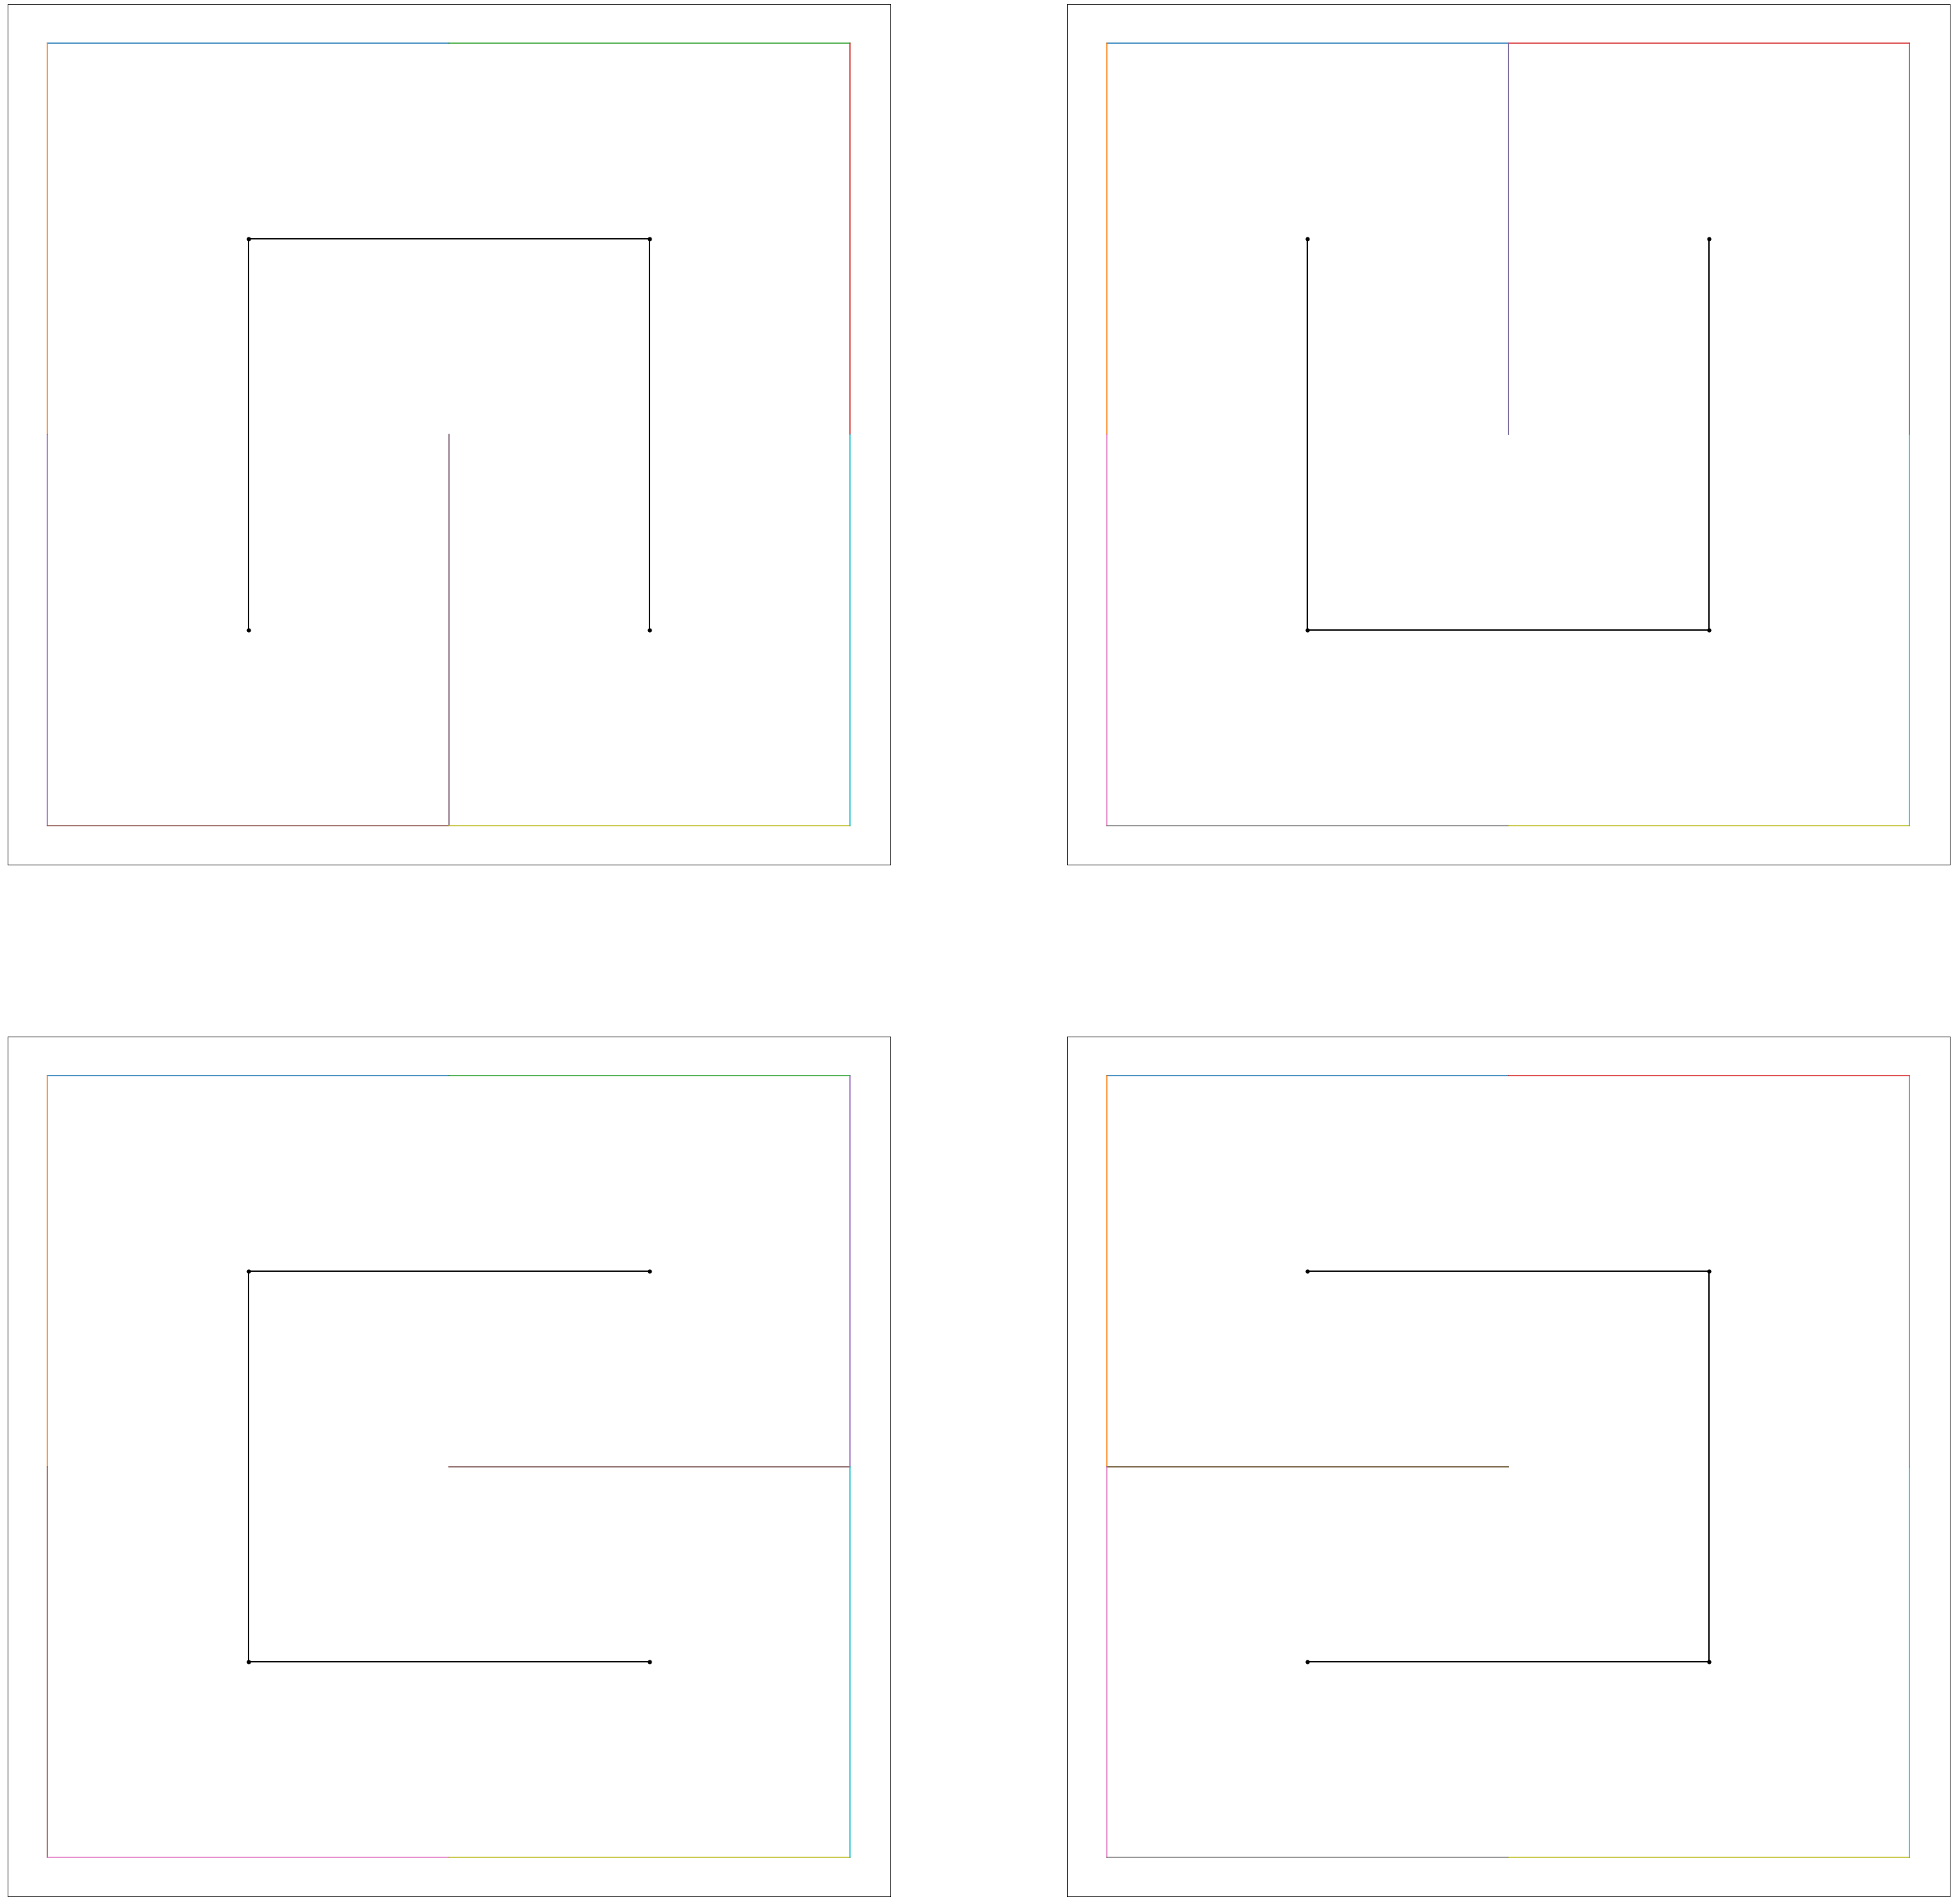

In [14]:
vL2x2 = treatment.generate_lab_bf(2,2)
cols = 2
rows = len(vL2x2)//cols
fig, axs = plt.subplots(rows, cols, figsize = (50,50*(rows//cols)))
for i in range(rows):
    for n in range(cols):
        axs[i,n].set_yticklabels([])
        axs[i,n].set_xticklabels([])
        axs[i,n].set_xticks([])
        axs[i,n].set_yticks([])
        if(cols*i+n==len(vL2x2)):
            break
        else:
            show_lab(axs[i,n], vL2x2[cols*i+n])
            show_graph(axs[i,n], vL2x2[cols*i+n])
            continue
        break
fig.savefig("data/docs/2x2true.png", dpi=200)
fig.show()

### Extraction des pseudo-labyrinthes contenant un mur

In [15]:
bon_nombre_de_murs = 1
presque_lab = []
for lab in L_2x2:
    if(treatment.nb_murs(lab) == 1):
        presque_lab.append(lab)

len(presque_lab)

4

C:\Users\User\AppData\Local\Temp/ipykernel_8532/355315979.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


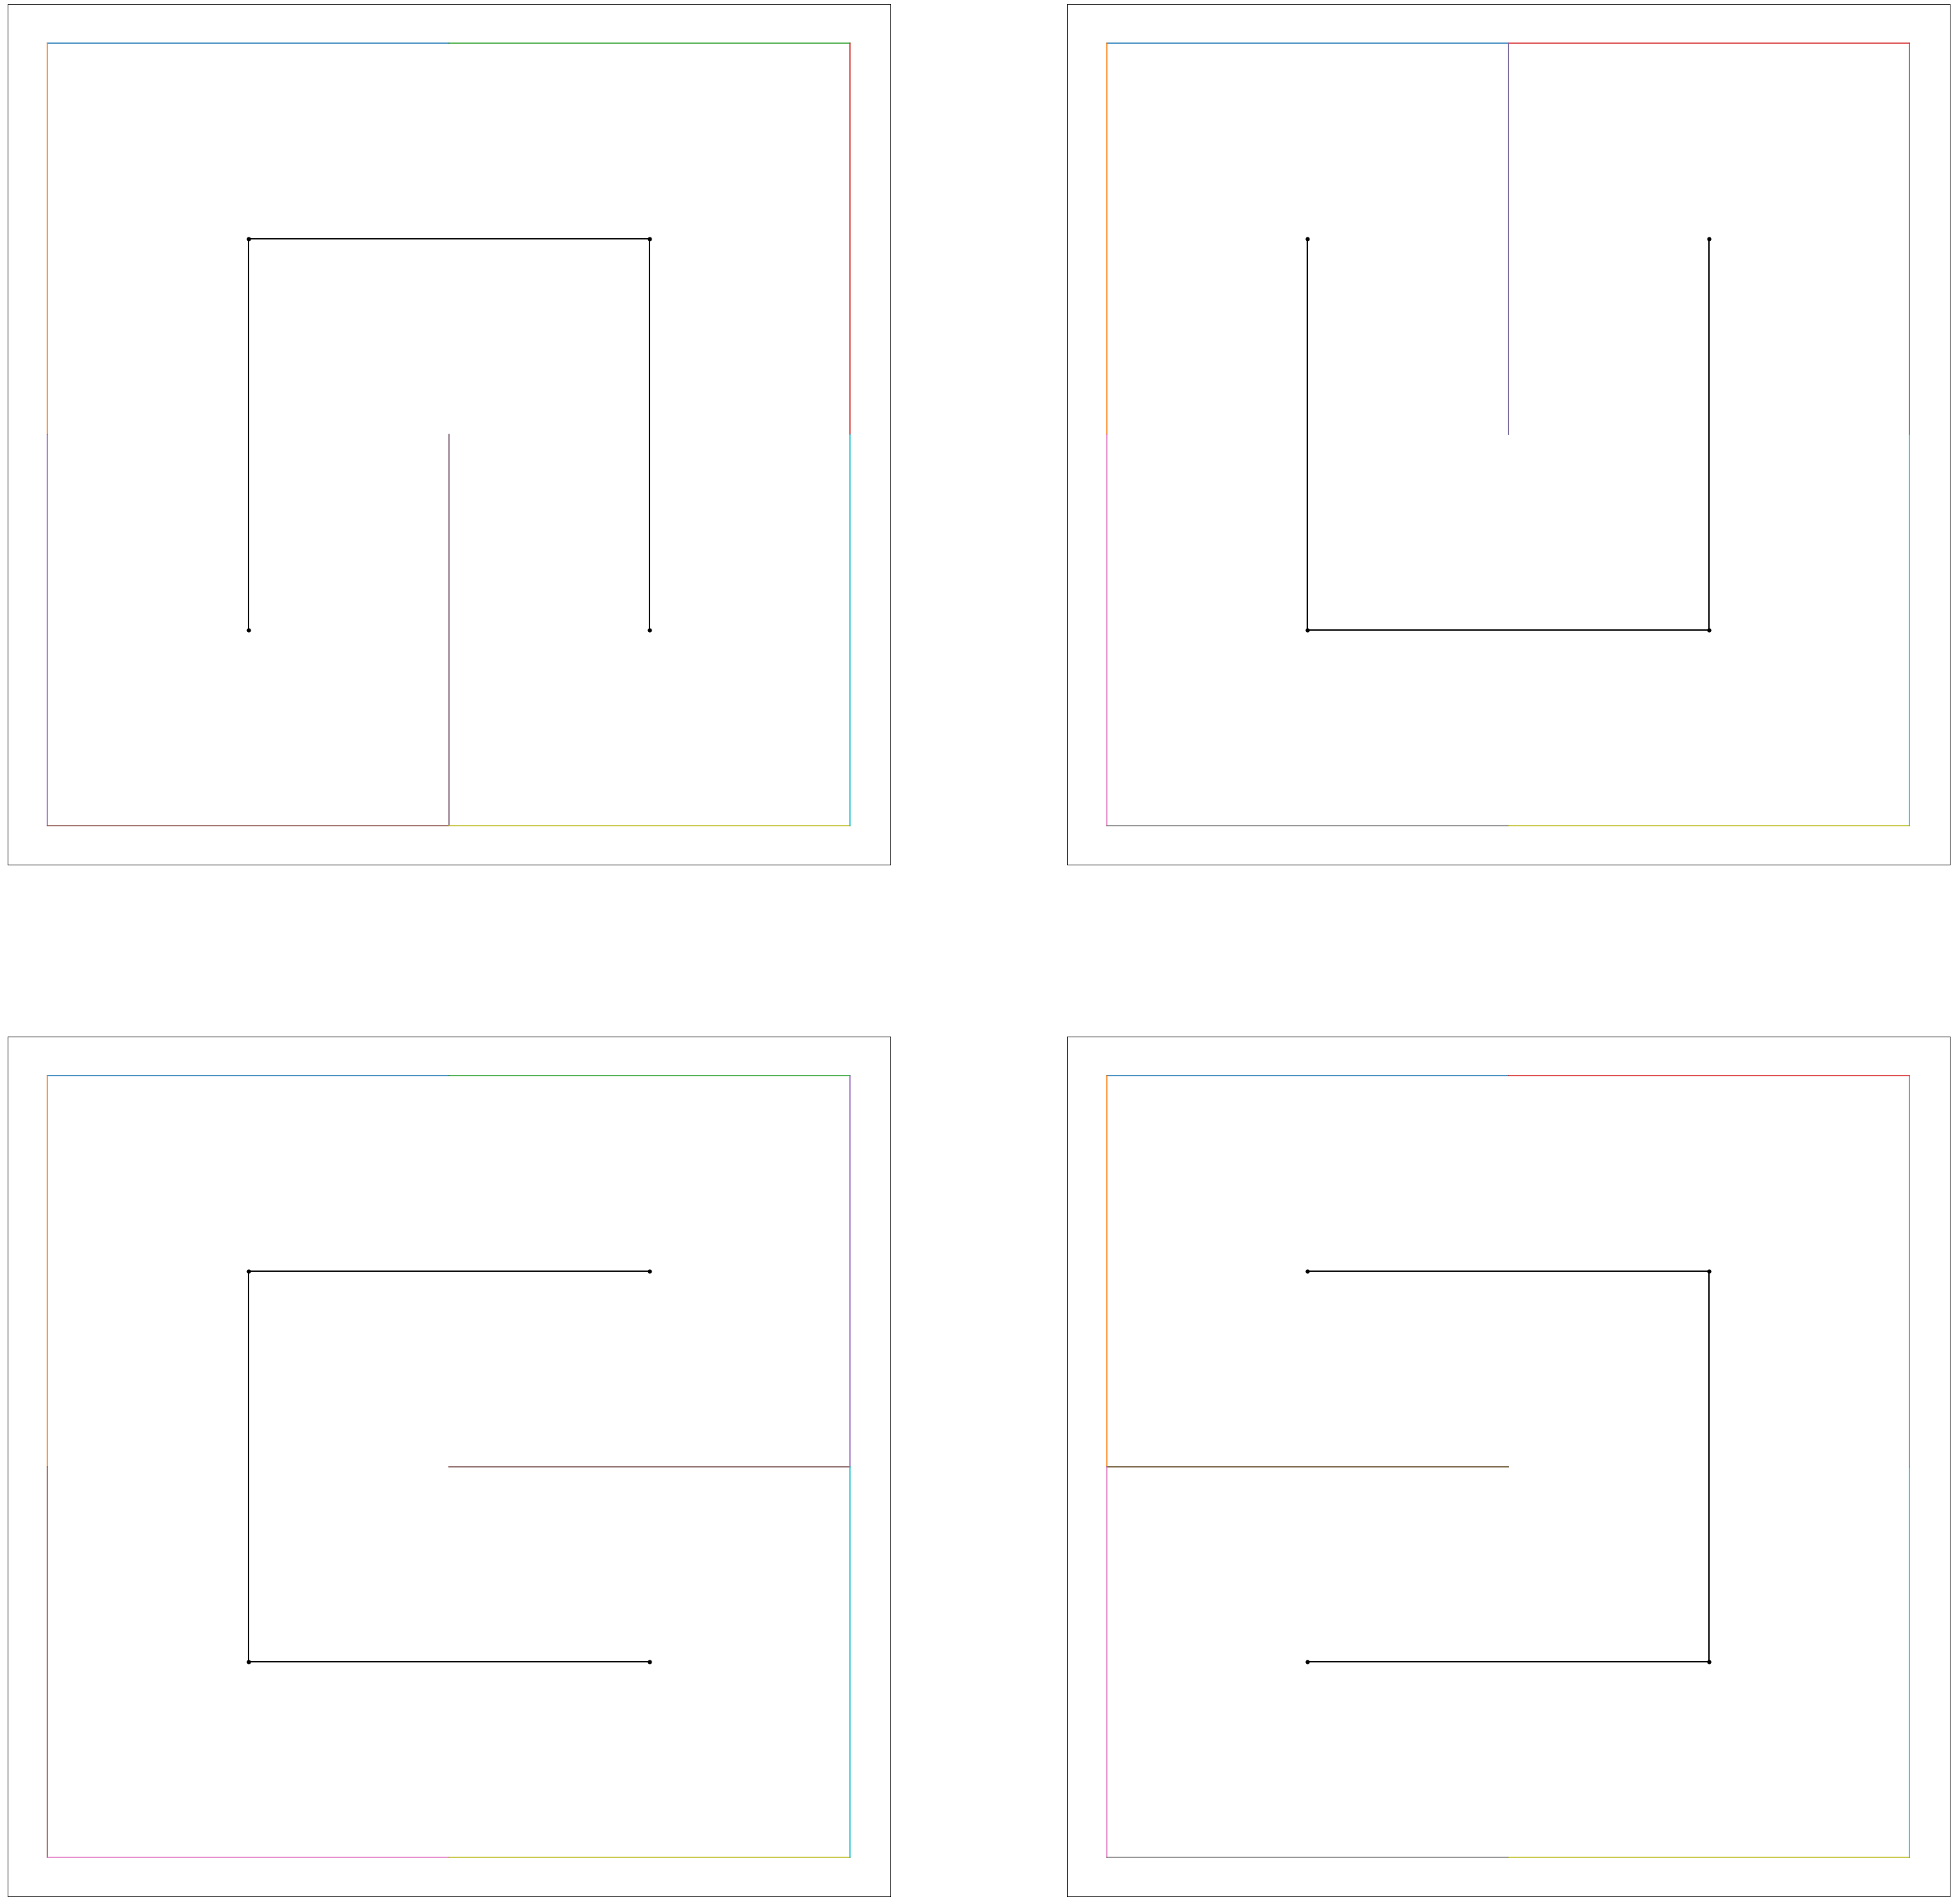

In [16]:
cols = 2
rows = len(presque_lab)//cols
fig, axs = plt.subplots(rows, cols, figsize = (50,50*(rows//cols)))
for i in range(rows):
    for n in range(cols):
        axs[i,n].set_yticklabels([])
        axs[i,n].set_xticklabels([])
        axs[i,n].set_xticks([])
        axs[i,n].set_yticks([])
        if(cols*i+n==len(presque_lab)):
            break
        else:
            show_lab(axs[i,n], presque_lab[cols*i+n])
            show_graph(axs[i,n], presque_lab[cols*i+n])
            continue
        break
fig.savefig("data/docs/2x2_bon_nb_murs.png", dpi=100)
fig.show()

## Cas du 3x2
### Pseudo-Labyrinthes

In [17]:
L_3x2 = treatment.generate_pseudo_lab(3,2)
L = L_3x2
print(len(L))
L[0]

128


{'ncolumns': 3,
 'nlines': 2,
 (0, 0): [(1, 0), (0, 1)],
 (0, 1): [(0, 0), (1, 1), (0, 2)],
 (0, 2): [(0, 1), (1, 2)],
 (1, 0): [(0, 0), (1, 1)],
 (1, 1): [(0, 1), (1, 0), (1, 2)],
 (1, 2): [(0, 2), (1, 1)]}

C:\Users\User\AppData\Local\Temp/ipykernel_8532/2480984161.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


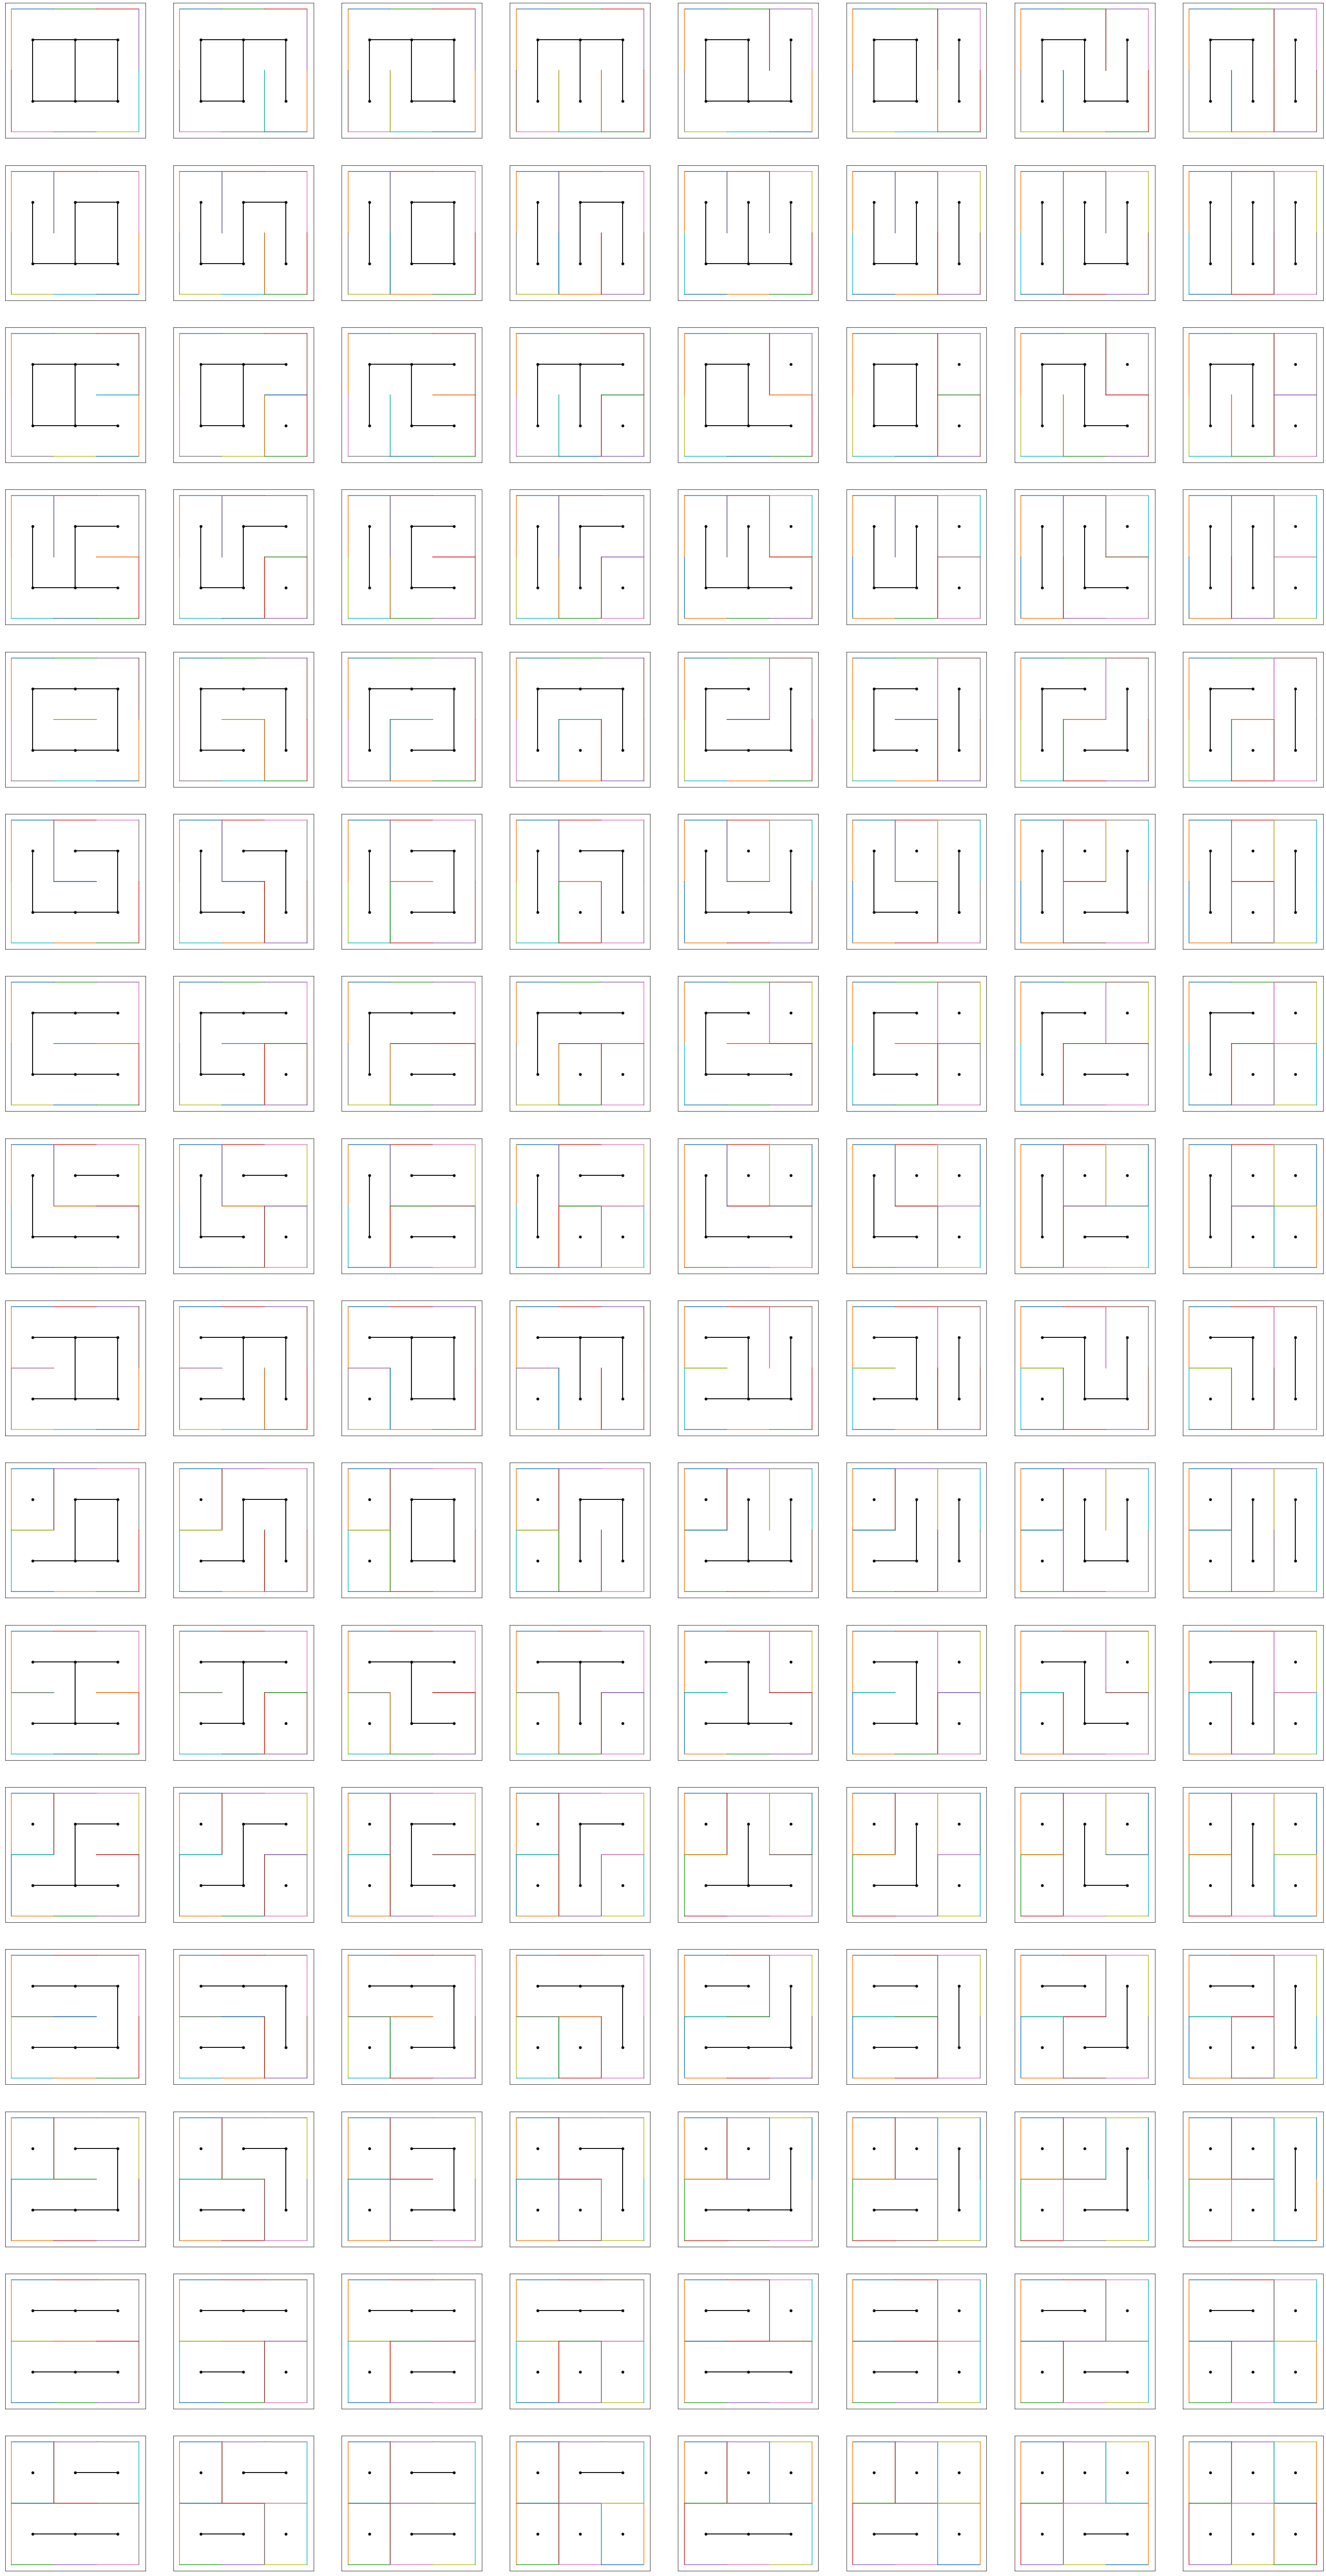

In [18]:
cols = 8
rows = len(L)//cols
fig, axs = plt.subplots(rows, cols, figsize = (50,50*(rows//cols)))
for i in range(rows):
    for n in range(cols):
        axs[i,n].set_yticklabels([])
        axs[i,n].set_xticklabels([])
        axs[i,n].set_xticks([])
        axs[i,n].set_yticks([])
        if(cols*i+n==len(L)):
            break
        else:
            show_lab(axs[i,n], L[cols*i+n])
            show_graph(axs[i,n], L[cols*i+n])
            continue
        break
fig.savefig("data/3x2/Total.png", dpi=150)
fig.show()

In [19]:
for i in range(len(L)):
    plt.clf()
    show_lab(plt,L[i])
    show_graph(plt, L[i])
    plt.xticks([])
    plt.yticks([])
    plt.savefig("data/3x2/{}.png".format(i))
plt.clf()

<Figure size 432x288 with 0 Axes>

### Labyrinthes

C:\Users\User\AppData\Local\Temp/ipykernel_8532/2153485056.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


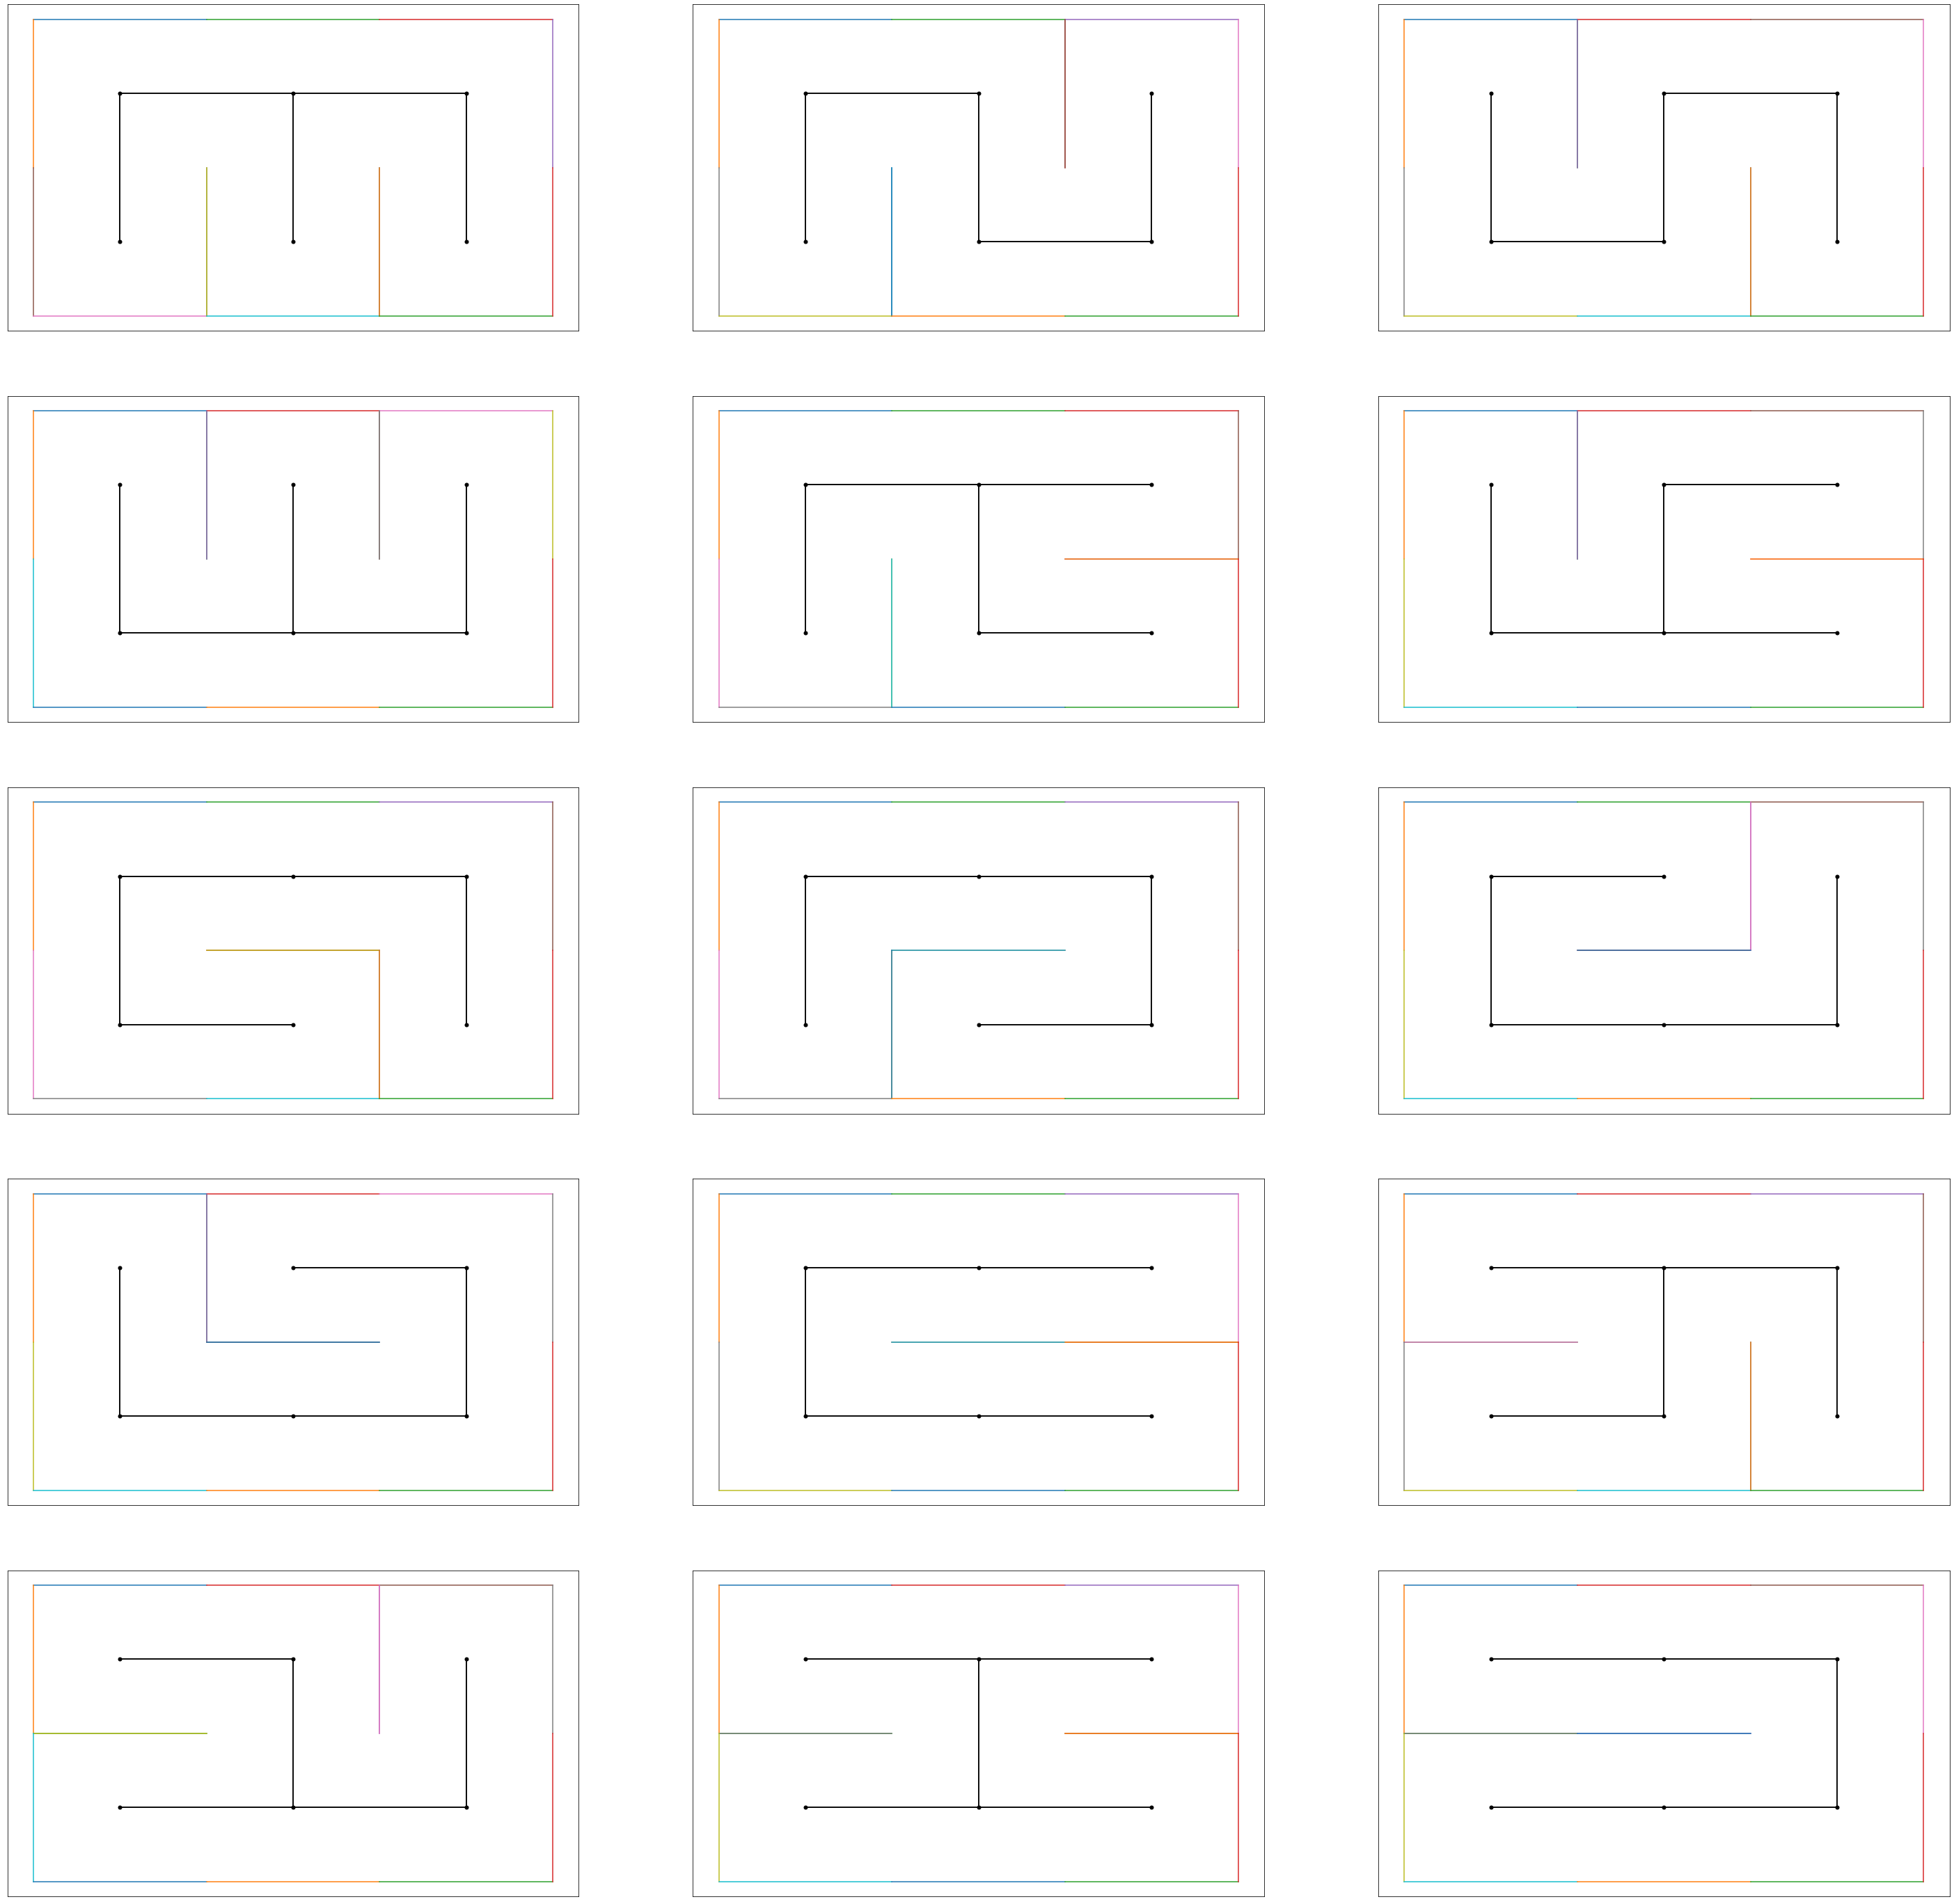

In [20]:
vL3x2 = treatment.generate_lab_bf(3,2)
cols = 3
rows = len(vL3x2)//cols
fig, axs = plt.subplots(rows, cols, figsize = (50,50*(rows//cols)))
for i in range(rows):
    for n in range(cols):
        axs[i,n].set_yticklabels([])
        axs[i,n].set_xticklabels([])
        axs[i,n].set_xticks([])
        axs[i,n].set_yticks([])
        if(cols*i+n==len(vL3x2)):
            break
        else:
            show_lab(axs[i,n], vL3x2[cols*i+n])
            show_graph(axs[i,n], vL3x2[cols*i+n])
            continue
        break
fig.savefig("data/docs/3x2true.png", dpi=200)
fig.show()

### Extraction des pseudo-labyrinthes contenant deux murs

In [21]:
bon_nombre_de_murs = 2
presque_lab = []
for lab in L_3x2:
    if(treatment.nb_murs(lab) == 2):
        presque_lab.append(lab)

len(presque_lab)

21

C:\Users\User\AppData\Local\Temp/ipykernel_8532/1769118333.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


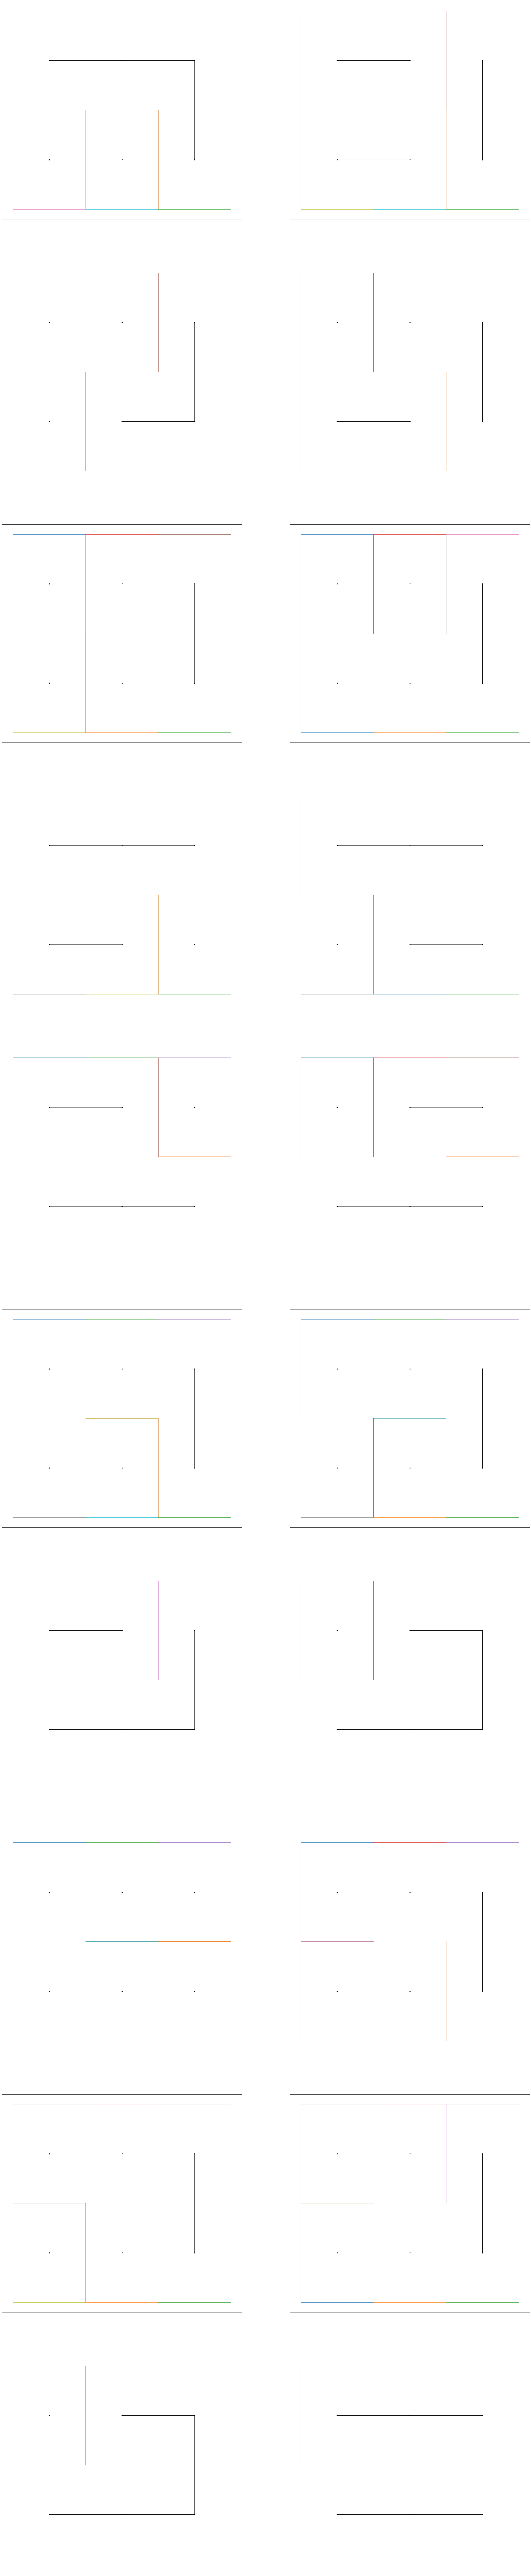

In [22]:
cols = 2
rows = len(presque_lab)//cols
fig, axs = plt.subplots(rows, cols, figsize = (50,50*(rows//cols)))
for i in range(rows):
    for n in range(cols):
        axs[i,n].set_yticklabels([])
        axs[i,n].set_xticklabels([])
        axs[i,n].set_xticks([])
        axs[i,n].set_yticks([])
        if(cols*i+n==len(presque_lab)):
            break
        else:
            show_lab(axs[i,n], presque_lab[cols*i+n])
            show_graph(axs[i,n], presque_lab[cols*i+n])
            continue
        break
fig.savefig("data/docs/3x2_bon_nb_murs.png", dpi=100)
fig.show()

## Illustration d'un 17x13

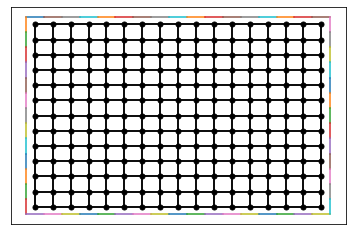

In [23]:
j = treatment.empty_lab(17,13)
j = treatment.reverse_lab(j)
plt.xticks([])
plt.yticks([])
show_lab(plt,j)
show_graph(plt,j)
plt.savefig("data/docs/17x13_full.png", dpi=200)

In [24]:
len(vL3x2)

15

In [2]:
l2x4 = treatment.generate_lab_deadends(2,4)
len(l2x4)

0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 10 | 11 | 12 | 13 | 14 | 13 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 21 | 22 | 23 | 24 | 25 | 24 | 25 | 10 | 11 | 12 | 13 | 14 | 15 | 

56

In [4]:
l3x3 = treatment.generate_lab_deadends(3,3)
len(l3x3)

0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 41 | 42 | 43 | 44 | 45 | 46 | 47 | 48 | 49 | 50 | 51 | 52 | 53 | 54 | 55 | 56 | 57 | 58 | 59 | 60 | 61 | 62 | 63 | 64 | 65 | 66 | 67 | 66 | 60 | 61 | 62 | 63 | 64 | 65 | 65 | 66 | 66 | 67 | 68 | 69 | 70 | 71 | 72 | 73 | 74 | 75 | 75 | 67 | 68 | 69 | 70 | 71 | 72 | 73 | 74 | 75 | 74 | 73 | 74 | 71 | 72 | 73 | 74 | 75 | 76 | 77 | 78 | 79 | 80 | 81 | 82 | 83 | 84 | 85 | 86 | 87 | 88 | 89 | 90 | 91 | 92 | 93 | 94 | 95 | 96 | 97 | 98 | 97 | 98 | 99 | 100 | 99 | 100 | 101 | 102 | 103 | 104 | 105 | 106 | 107 | 108 | 109 | 110 | 111 | 112 | 113 | 114 | 115 | 116 | 111 | 110 | 111 | 112 | 113 | 113 | 114 | 115 | 116 | 116 | 117 | 112 | 113 | 104 | 105 | 106 | 107 | 108 | 109 | 110 | 111 | 112 | 113 | 114 | 115 | 116 | 117 | 118 | 117 | 118 | 106 | 107 | 72 | 73 | 21 | 20 | 21 | 22 | 23 | 23 | 

192

In [5]:
l2x5 = treatment.generate_lab_deadends(2,5)
len(l2x5)

0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 41 | 42 | 43 | 44 | 45 | 46 | 47 | 42 | 43 | 44 | 41 | 42 | 43 | 30 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 27 | 28 | 29 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 41 | 42 | 43 | 44 | 45 | 46 | 47 | 48 | 49 | 50 | 51 | 52 | 53 | 54 | 55 | 56 | 57 | 58 | 59 | 60 | 61 | 62 | 63 | 64 | 65 | 66 | 67 | 68 | 69 | 70 | 71 | 72 | 73 | 74 | 75 | 76 | 77 | 78 | 78 | 79 | 80 | 81 | 82 | 83 | 84 | 85 | 86 | 87 | 88 | 89 | 90 | 91 | 92 | 93 | 88 | 89 | 90 | 91 | 92 | 93 | 94 | 95 | 96 | 87 | 88 | 89 | 90 | 91 | 92 | 93 | 94 | 95 | 96 | 97 | 98 | 99 | 100 | 101 | 76 | 77 | 78 | 79 | 80 | 81 

209

In [6]:
l2x6 = treatment.generate_lab_deadends(2,6)
len(l2x6)

0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 41 | 42 | 43 | 44 | 45 | 46 | 47 | 48 | 49 | 50 | 51 | 52 | 53 | 54 | 55 | 56 | 57 | 58 | 59 | 60 | 61 | 62 | 63 | 64 | 65 | 66 | 67 | 68 | 69 | 70 | 70 | 71 | 72 | 73 | 74 | 75 | 76 | 77 | 78 | 79 | 80 | 81 | 82 | 83 | 83 | 84 | 85 | 86 | 87 | 88 | 89 | 90 | 91 | 92 | 93 | 94 | 95 | 96 | 97 | 98 | 99 | 100 | 101 | 102 | 103 | 104 | 105 | 106 | 107 | 108 | 109 | 110 | 111 | 112 | 113 | 114 | 115 | 116 | 117 | 118 | 119 | 120 | 121 | 122 | 123 | 124 | 125 | 126 | 127 | 128 | 129 | 130 | 131 | 132 | 133 | 134 | 135 | 136 | 137 | 138 | 139 | 140 | 141 | 142 | 143 | 144 | 127 | 128 | 129 | 130 | 131 | 132 | 133 | 134 | 135 | 124 | 125 | 126 | 127 | 128 | 129 | 130 | 131 | 132 | 89 | 90 | 90 | 91 | 92 | 93 | 94 | 95 | 96 | 97 | 98 | 99 | 100 | 101 | 102 | 103 | 104 | 105 | 106 | 107 | 108 | 109 | 11

780

In [3]:
l3x4 = treatment.generate_lab_deadends(3,4)
len(l3x4)

0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 41 | 42 | 43 | 44 | 45 | 46 | 47 | 48 | 49 | 50 | 51 | 52 | 53 | 54 | 55 | 56 | 57 | 58 | 59 | 60 | 61 | 62 | 63 | 64 | 64 | 65 | 66 | 67 | 68 | 69 | 70 | 71 | 63 | 64 | 65 | 66 | 67 | 68 | 69 | 70 | 71 | 72 | 73 | 74 | 75 | 76 | 77 | 78 | 79 | 80 | 81 | 82 | 83 | 84 | 85 | 86 | 87 | 88 | 89 | 90 | 91 | 92 | 93 | 94 | 95 | 96 | 97 | 98 | 99 | 100 | 101 | 102 | 103 | 104 | 105 | 106 | 107 | 108 | 109 | 110 | 111 | 112 | 113 | 114 | 115 | 116 | 117 | 118 | 119 | 120 | 121 | 122 | 123 | 124 | 125 | 126 | 127 | 128 | 129 | 130 | 131 | 132 | 133 | 134 | 135 | 136 | 137 | 138 | 139 | 140 | 141 | 142 | 143 | 144 | 145 | 146 | 147 | 148 | 149 | 150 | 149 | 150 | 151 | 152 | 153 | 154 | 155 | 156 | 157 | 158 | 159 | 160 | 161 | 162 | 163 | 164 | 165 | 166 | 167 | 168 | 169 | 170 | 171 | 172 | 

2415

|                 |        1        |        2        |        3        |        4        |
| :-------------: | :-------------: | :-------------: | :-------------: | :-------------: |
|      **1**      |        1        |        1        |        1        |        1        |
|      **2**      |        1        |        4        |       15        |       56        |
|      **3**      |        1        |       15        |       192       |      2415       |
|      **4**      |        1        |       56        |      2415       |     100472      |

In [5]:
treatment.kirchhoff(5, 5)

557568000

In [3]:
treatment.laplace(3, 2)

array([[ 2, -1,  0, -1,  0,  0],
       [-1,  3, -1,  0, -1,  0],
       [ 0, -1,  2,  0,  0, -1],
       [-1,  0,  0,  2, -1,  0],
       [ 0, -1,  0, -1,  3, -1],
       [ 0,  0, -1,  0, -1,  2]])

In [4]:
treatment.laplace(2, 3)

array([[ 2, -1, -1,  0,  0,  0],
       [-1,  2,  0, -1,  0,  0],
       [-1,  0,  3, -1, -1,  0],
       [ 0, -1, -1,  3,  0, -1],
       [ 0,  0, -1,  0,  2, -1],
       [ 0,  0,  0, -1, -1,  2]])